In [ ]:
!pip install pyspark 
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cur_path = "/content/drive/MyDrive/Colab Notebooks/5460/project/"
os.chdir(cur_path)
!pwd

/content/drive/MyDrive/Colab Notebooks/5460/project


In [ ]:
# The entry point to programming Spark with the DataFrame API.
from pyspark.sql import SparkSession

In [ ]:
# May take a little while on a local computer
spark = SparkSession.builder.master("local[4]").appName("DataFrame").getOrCreate()

In [ ]:
df2 = spark.read.csv(cur_path + 'cleaned_data.csv',inferSchema=True,header=True)

In [ ]:
df2 = df2.drop('_c0')

In [ ]:
df2.show(10)

+----+---------+-------------------+--------------------+-----------+------------+-----+---------+--------+-----+--------+--------------------+-----+------------+--------+----------+
|year|     make|              model|                trim|       body|transmission|state|condition|odometer|color|interior|              seller|  mmr|sellingprice|saledate|madeRegion|
+----+---------+-------------------+--------------------+-----------+------------+-----+---------+--------+-----+--------+--------------------+-----+------------+--------+----------+
|2015|      Kia|            Sorento|                  LX|        suv|   automatic|   ca|      5.0| 16639.0|white|   black|kia motors americ...|20500|       21500|    2014|        5x|
|2015|      Kia|            Sorento|                  LX|        suv|   automatic|   ca|      5.0|  9393.0|white|   beige|kia motors americ...|20800|       21500|    2014|        5x|
|2014|      BMW|           3 Series|          328i SULEV|      sedan|   automatic|   

In [ ]:
df2.printSchema()

root
 |-- year: integer (nullable = true)
 |-- make: string (nullable = true)
 |-- model: string (nullable = true)
 |-- trim: string (nullable = true)
 |-- body: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- state: string (nullable = true)
 |-- condition: double (nullable = true)
 |-- odometer: double (nullable = true)
 |-- color: string (nullable = true)
 |-- interior: string (nullable = true)
 |-- seller: string (nullable = true)
 |-- mmr: integer (nullable = true)
 |-- sellingprice: integer (nullable = true)
 |-- saledate: integer (nullable = true)
 |-- madeRegion: string (nullable = true)



In [ ]:
import pandas as pd
df2_python = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5460/project/cleaned_data.csv',usecols=lambda x: x != ' ', on_bad_lines='skip')

In [ ]:
df2_python = df2_python.drop(['Unnamed: 0'], 1)
df2_python.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,madeRegion
0,2015,Kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014,5x
1,2015,Kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014,5x
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015,wb
3,2015,Volvo,S60,T5,sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015,yv
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014,wb


In [ ]:
df2_python.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate          int64
madeRegion       object
dtype: object

In [ ]:
df2_python['sale_gap'] = df2_python['sellingprice']-df2_python['mmr']

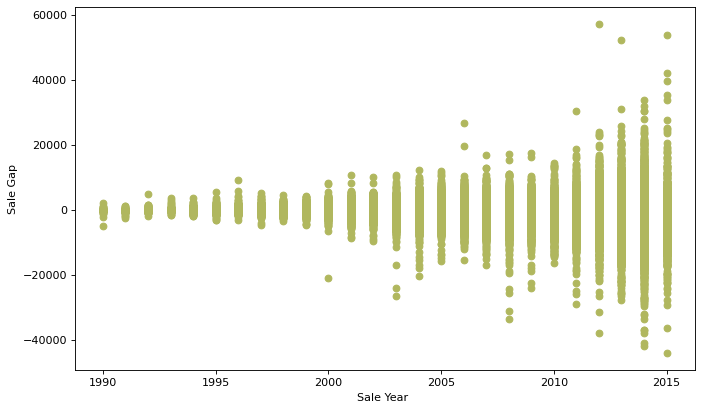

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

df = df2_python

#fig = plt.figure()
#fig.set_figheight(value_height)
#fig.set_figwidth(value_width)

figure(figsize = (10, 6), dpi = 80)
plt.scatter(df[(df['sale_gap'] > -80000) & (df['sale_gap'] < 80000) ]['year'],df[(df['sale_gap'] > -80000) & (df['sale_gap'] < 80000)]['sale_gap'],c='#b0b75e')
plt.ylabel('Sale Gap')
plt.xlabel('Sale Year ')
plt.show()


In [ ]:
df = df[(df['sale_gap_perc'] > -2) & (df['sale_gap_perc'] < 2) ]
df = df[(df['sale_gap'] > -80000) & (df['sale_gap'] < 80000) ]

In [ ]:
df['sale_gap'].mean()

-128.37636350502058

In [ ]:
df['sale_gap_perc'].mean()

-0.04753126521048923

In [ ]:
df['sale_gap'].std()

1651.4145943981757

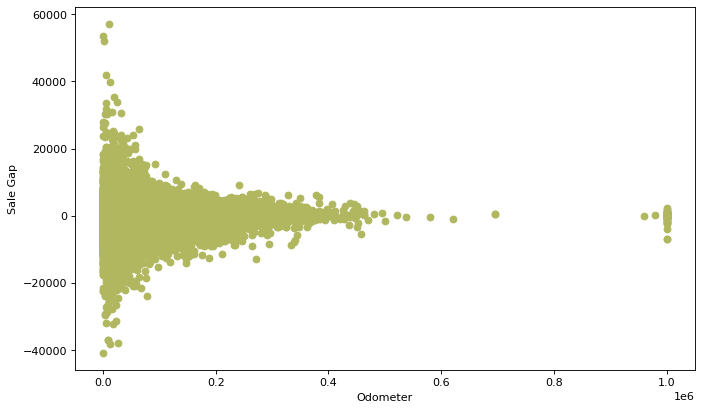

In [ ]:
figure(figsize = (10, 6), dpi = 80)

plt.scatter(df['odometer'],df['sale_gap'],c='#b0b75e')
plt.ylabel('Sale Gap')
plt.xlabel('Odometer')
plt
plt.show()

<Figure size 800x480 with 0 Axes>

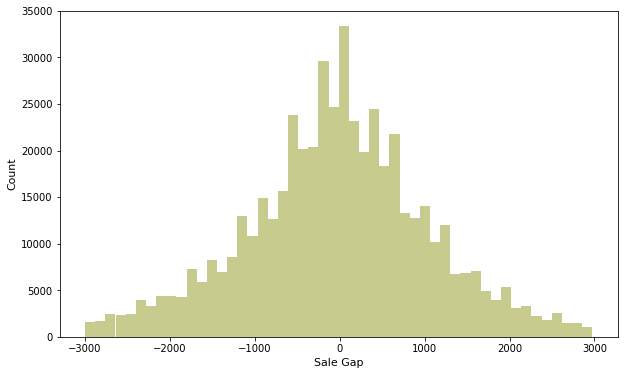

In [ ]:
figure(figsize = (10, 6), dpi = 80)

fig = plt.figure()
fig.set_size_inches(10, 6, forward=True)
ax = fig.add_subplot()
ax.hist(df[(df['sale_gap'] > -3000) & (df['sale_gap'] < 3000) ]['sale_gap'], bins=50, alpha=0.7,color='#b0b75e')
ax.set_xlabel('Sale Gap', size =11)
ax.set_ylabel('Count', size =11)

plt.show()

In [ ]:
df = df[(df['sale_gap'] > -3000) & (df['sale_gap'] < 3000) ]